In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy import linalg
%matplotlib inline
mlp.rcParams['figure.dpi']=300
plt.style.use('ggplot')

In [3]:
ind = pd.read_csv("ind30.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip() # remove first and last spaces from the attributes' name
pd.set_option("display.max_columns", None) # add this line of code to avoid some columns being omitted
print("Shape of the DataFrame is: ",ind.shape) 
ind.head(20) # As you can see, the DataFrame is structured as a time series

Shape of the DataFrame is:  (1110, 30)


Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   
1926-12 -0.0051 -0.0409  0.0255  0.0217  0.0053  0.0256  0.0060  0.0011   
1927-01 -0.0084  0.0057 -0.0035  0.0187  0.0967  0.0408 -0.0106  0.0505   
1927-02  0.0442  0.1283  0.0149  0.0164  0.0141  0.0457  0.0277  0.0171   
1927-03  0.0209 -0.1356  0.0551  0.0102 -0.0028 -0.0008  0.0090  0.0101   
1927-04  0.0272  0.0285  0.0401 -0.0377 -0.0096  0.0144  0.0595  0.0274   
1927-05  0.0613  0.1162  0.1180  0.0018  0.0313  0.1054  0.0337  0.0412   
1927-06 -0.0222  0.1005 -0.0230 -0.0774  0.1254 -0.0303  0.0117  0.0054   
1927-07  0.0504  0.0459  0.0439  0.0114  0.0178  0.0550  0.0601  0.0984   
1927-08  0.0233 -0.0398  0.0383  0.0620  0.0546  0.0052  0.0156  0.0028   
1927-09  0.0604  0.0701  0.0463  0.0418  0.1004  0.0253  0.0465  0.0565   
1927-10 -0.0246 -0.0080 -0.0032  0.0026  0.0263 -0.0184  0.0965  0.0513   
1927-11  0.0717  0.1029  0.0669  0.0358  0.1662  0.0273  0.0206  0.0368   
1927-12  0.0353  0.1272  0.0103  0.0281  0.0327  0.1031 -0.0015 -0.0046   
1928-01  0.0254  0.0062 -0.0256 -0.0037  0.0516  0.0367  0.0707  0.0269   
1928-02 -0.0296 -0.0522 -0.0597 -0.0089 -0.0175 -0.0001 -0.0245 -0.0138   

          Chems   Txtls   Cnstr   Steel   FabPr   ElcEq   Autos   Carry  \
1926-07  0.0814  0.0039  0.0207  0.0407  0.0543  0.0318  0.1639  0.0102   
1926-08  0.0550  0.0814  0.0472  0.0217  0.0206  0.0210  0.0423  0.0166   
1926-09  0.0533  0.0231 -0.0050  0.0015  0.0036 -0.0056  0.0483  0.0273   
1926-10 -0.0476  0.0100 -0.0455 -0.0385  0.0111 -0.0573 -0.0793 -0.0556   
1926-11  0.0520  0.0311  0.0220  0.0386  0.0318  0.0508 -0.0066  0.0787   
1926-12  0.0537  0.0643  0.0352  0.0375  0.0502 -0.0247  0.1049  0.0248   
1927-01  0.0023 -0.0150 -0.0189 -0.0039  0.0119 -0.0102 -0.0081 -0.0061   
1927-02  0.0969  0.0774  0.0417  0.0367  0.0785  0.0430  0.0956  0.0460   
1927-03  0.0607 -0.0539  0.0346  0.0148 -0.0224  0.0040  0.0156 -0.0176   
1927-04  0.0295  0.0054 -0.0095 -0.0034  0.0182  0.0629  0.0291 -0.0075   
1927-05  0.0385  0.1322  0.0751  0.0322  0.0874  0.0823  0.0554  0.1102   
1927-06 -0.0172  0.0229 -0.0469 -0.0342 -0.0229  0.0347 -0.0337 -0.0390   
1927-07  0.1769  0.0436  0.0635  0.1033  0.0961  0.1469  0.1371  0.1199   
1927-08  0.0210  0.0047 -0.0117  0.0397  0.0090  0.0706  0.0732  0.0397   
1927-09  0.0597  0.0189  0.0456  0.0377  0.0530  0.0011  0.0628  0.0373   
1927-10 -0.0746 -0.0261 -0.0454 -0.0782 -0.0521 -0.0822 -0.0455 -0.0671   
1927-11  0.0904  0.0576  0.0553  0.1244  0.1150  0.1138  0.0677  0.0814   
1927-12 -0.0023  0.0267  0.0005  0.0584  0.0292  0.0119  0.0767  0.0276   
1928-01 -0.0108 -0.0110  0.0184 -0.0242 -0.0124 -0.0101 -0.0315  0.0419   
1928-02  0.0073 -0.0531  0.0158 -0.0272 -0.0276 -0.0146  0.0094 -0.0460   

          Mines    Coal     Oil    Util   Telcm   Servs   BusEq   Paper  \
1926-07  0.0564  0.0154 -0.0140  0.0704  0.0083  0.0922  0.0206  0.0770   
1926-08  0.0055  0.0085  0.0369 -0.0169  0.0217  0.0202  0.0439 -0.0238   
1926-09  0.0174  0.0030 -0.0369  0.0204  0.0241  0.0225  0.0019 -0.0554   
1926-10 -0.0320  0.0223 -0.0104 -0.0263 -0.0011 -0.0200 -0.0109 -0.0508   
1926-11  0.0846 -0.0048  0.0006  0.0371  0.0163  0.0377  0.0364  0.0384   
1926-12  0.0183  0.0143  0.0294 -0.0017  0.0199  0.0621  0.0724 -0.0463   
1927-01  0.0417 -0.0306  0.0167 -0.0179  0.0188  0.0208 -0.0145 -0.0260   
1927-02  0.0520  0.0564  0.0113  0.0453  0.0397  0.0890  0.0485  0.0546   
1927-03  0.0444  0.0545 -0.0701  0.0037  0.0556 -0.0780  0.0429 -0.0967   
1927-04  0.0302  0.0095 -0.0578  0.0171 -0.0213  0.0344  0.0310  0.0493   
1927-05  0.0025  0.0319  0.0500  0

## Expected Returns and the Covariance Matrix
Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in future lectures. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimation of expected returns using the annualize_rets() function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000:

In [4]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [5]:
er = annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [6]:
ind['1996':'2000']

Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1996-01  0.0342  0.0326  0.0182  0.0469 -0.0049  0.0285 -0.0236  0.0595   
1996-02  0.0162  0.0561  0.0318  0.0179  0.0233 -0.0044  0.0187 -0.0107   
1996-03 -0.0382  0.0190 -0.0768  0.0108  0.0027  0.0130  0.1149  0.0024   
1996-04 -0.0032 -0.0089 -0.0160  0.0237  0.0285  0.0388  0.0541 -0.0060   
1996-05  0.0550  0.0969  0.0548  0.0279  0.0349  0.0325  0.0805  0.0393   
1996-06  0.0238  0.0654  0.0368 -0.0259 -0.0046  0.0122  0.0012 -0.0019   
1996-07 -0.0245 -0.0578  0.0020 -0.1182 -0.0700 -0.0332 -0.0433 -0.0606   
1996-08 -0.0040  0.0214 -0.1318  0.0030  0.0363  0.0169  0.0577  0.0419   
1996-09  0.0876  0.0073  0.0141  0.0743  0.0232  0.0634  0.0715  0.0734   
1996-10  0.0255  0.0078  0.0331 -0.0169  0.0047  0.0105 -0.0025 -0.0068   
1996-11  0.0577  0.0274  0.1074  0.0830  0.0558  0.0540 -0.0049  0.0666   
1996-12 -0.0217  0.0052  0.0930 -0.0643 -0.0210  0.0039  0.0265 -0.0266   
1997-01  0.0289  0.1136  0.0463  0.0359  0.0075  0.0643  0.0644  0.0955   
1997-02  0.0279  0.0274  0.1247 -0.0026  0.0239  0.0287  0.0312  0.0094   
1997-03 -0.0120 -0.0653 -0.1354 -0.0320  0.0071 -0.0606 -0.0566 -0.0740   
1997-04  0.0337  0.1137  0.0324  0.0275 -0.0076  0.0845 -0.0410  0.0616   
1997-05  0.0257  0.0643  0.0998  0.0560  0.0706  0.0815  0.0501  0.0691   
1997-06  0.0654  0.0007  0.0267  0.0141  0.0610  0.0417  0.0360  0.0889   
1997-07  0.0571  0.0185  0.0130  0.0178  0.0486  0.0443  0.0311  0.0206   
1997-08 -0.0415 -0.1261 -0.0304 -0.0251 -0.0254 -0.0826 -0.0618 -0.0614   
1997-09  0.0639  0.0811 -0.0278  0.0510  0.0722  0.0511  0.0507  0.0661   
1997-10 -0.0153 -0.0595 -0.0416 -0.0027 -0.0099 -0.0371 -0.0795  0.0026   
1997-11  0.0749  0.0729  0.0865  0.0748  0.0393  0.0553  0.0148  0.0286   
1997-12  0.0323  0.0420  0.0538  0.0251  0.0622  0.0298 -0.0897  0.0355   
1998-01 -0.0380 -0.0203 -0.0735  0.0637 -0.0066  0.0080  0.0041  0.0573   
1998-02  0.0445  0.0469  0.0450  0.0577  0.0631  0.0910  0.1162  0.0545   
1998-03  0.0423  0.1245 -0.0326 -0.0040  0.0532  0.0424  0.0426  0.0361   
1998-04 -0.0321 -0.0308 -0.1083  0.0863  0.0162  0.0106  0.0271  0.0192   
1998-05  0.0108  0.0288  0.0059 -0.0651 -0.0077 -0.0121 -0.0078 -0.0247   
1998-06 -0.0025  0.0671  0.0552 -0.0260  0.0597  0.0367  0.0215  0.0618   
1998-07 -0.0777 -0.0449  0.1037 -0.0237 -0.0271 -0.0348 -0.1018 -0.0022   
1998-08 -0.0896 -0.1976 -0.0520 -0.2216 -0.1040 -0.1092 -0.2215 -0.1226   
1998-09  0.0437 -0.0502  0.1246 -0.0138 -0.0033 -0.0511  0.0253  0.1201   
1998-10  0.0920  0.1576  0.1082  0.0696  0.0737  0.1854  0.0686  0.0385   
1998-11  0.0434  0.0579  0.0915  0.1257  0.0836  0.0109  0.0336  0.0618   
1998-12 -0.0164 -0.0031 -0.0304 -0.0308  0.0945  0.0540  0.0380  0.0502   
1999-01 -0.0379 -0.0165 -0.1221  0.0819 -0.0098 -0.0209  0.0697  0.0024   
1999-02 -0.0375 -0.0134 -0.1597  0.0505 -0.0016 -0.0127  0.0195  0.0023   
1999-03 -0.0330 -0.0165 -0.0893 -0.0501  0.0293  0.0495  0.0149  0.0255   
1999-04  0.0099  0.0503  0.0007  0.0489  0.0580  0.0423  0.0860 -0.0554   
1999-05  0.0388 -0.0063  0.0996 -0.0555 -0.0146 -0.0301 -0.0255 -0.0205   
1999-06  0.0069 -0.0431  0.0486  0.0546  0.0403  0.0133  0.0159  0.0449   
1999-07 -0.0390  0.0026 -0.0688 -0.0657 -0.0042 -0.0106 -0.0989 -0.0444   
1999-08 -0.0229 -0.0385  0.0055 -0.0187 -0.0944  0.0262 -0.1112  0.0373   
1999-09 -0.0472 -0.1494 -0.0691 -0.0310  0.0133 -0.0976  0.0470 -0.0709   
1999-10  0.0870  0.1641 -0.2493  0.0136  0.1015  0.1153  0.0025  0.1078   
1999-11 -0.0672  0.0885  0.0352  0.0662 -0.0809  0.0012 -0.1036  0.0150   
1999-12 -0.0567 -0.0883 -0.1015  0.0710  0.1276  0.0417  0.0392 -0.0564   
2000-01 -0.0829 -0.0228 -0.0862  0.0229 -0.0092 -0.0651 -0.1138  0.0756   
2000-02 -0.0689 -0.1164 -0.0401 -0.0177 -0.0071 -0.1157 -0.1278 -0.0288   
2000-03  0.0969  0.0013  0.0511  0.1052  0.1293 -0.1426  0.2506  0.0028   
2000-04 -0.0390  0.0368  0.0379  0.0220 -0.0734  0.0429  0.0430  0.0525   
2000-05  0.1565  0.1187  0.1951  0.0

In [7]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

## Simulation

### Two asset case

In [8]:
def sim_ef2(n_points, er, cov):
    """
    Simulates the 2-asset portfolio returns and volatility
    """
    if er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    plt.figure()
    ef.plot.line(x="Volatility", y="Returns", style=".-", xlim=[min(vols)*0.9,max(vols)*1.1])
    

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

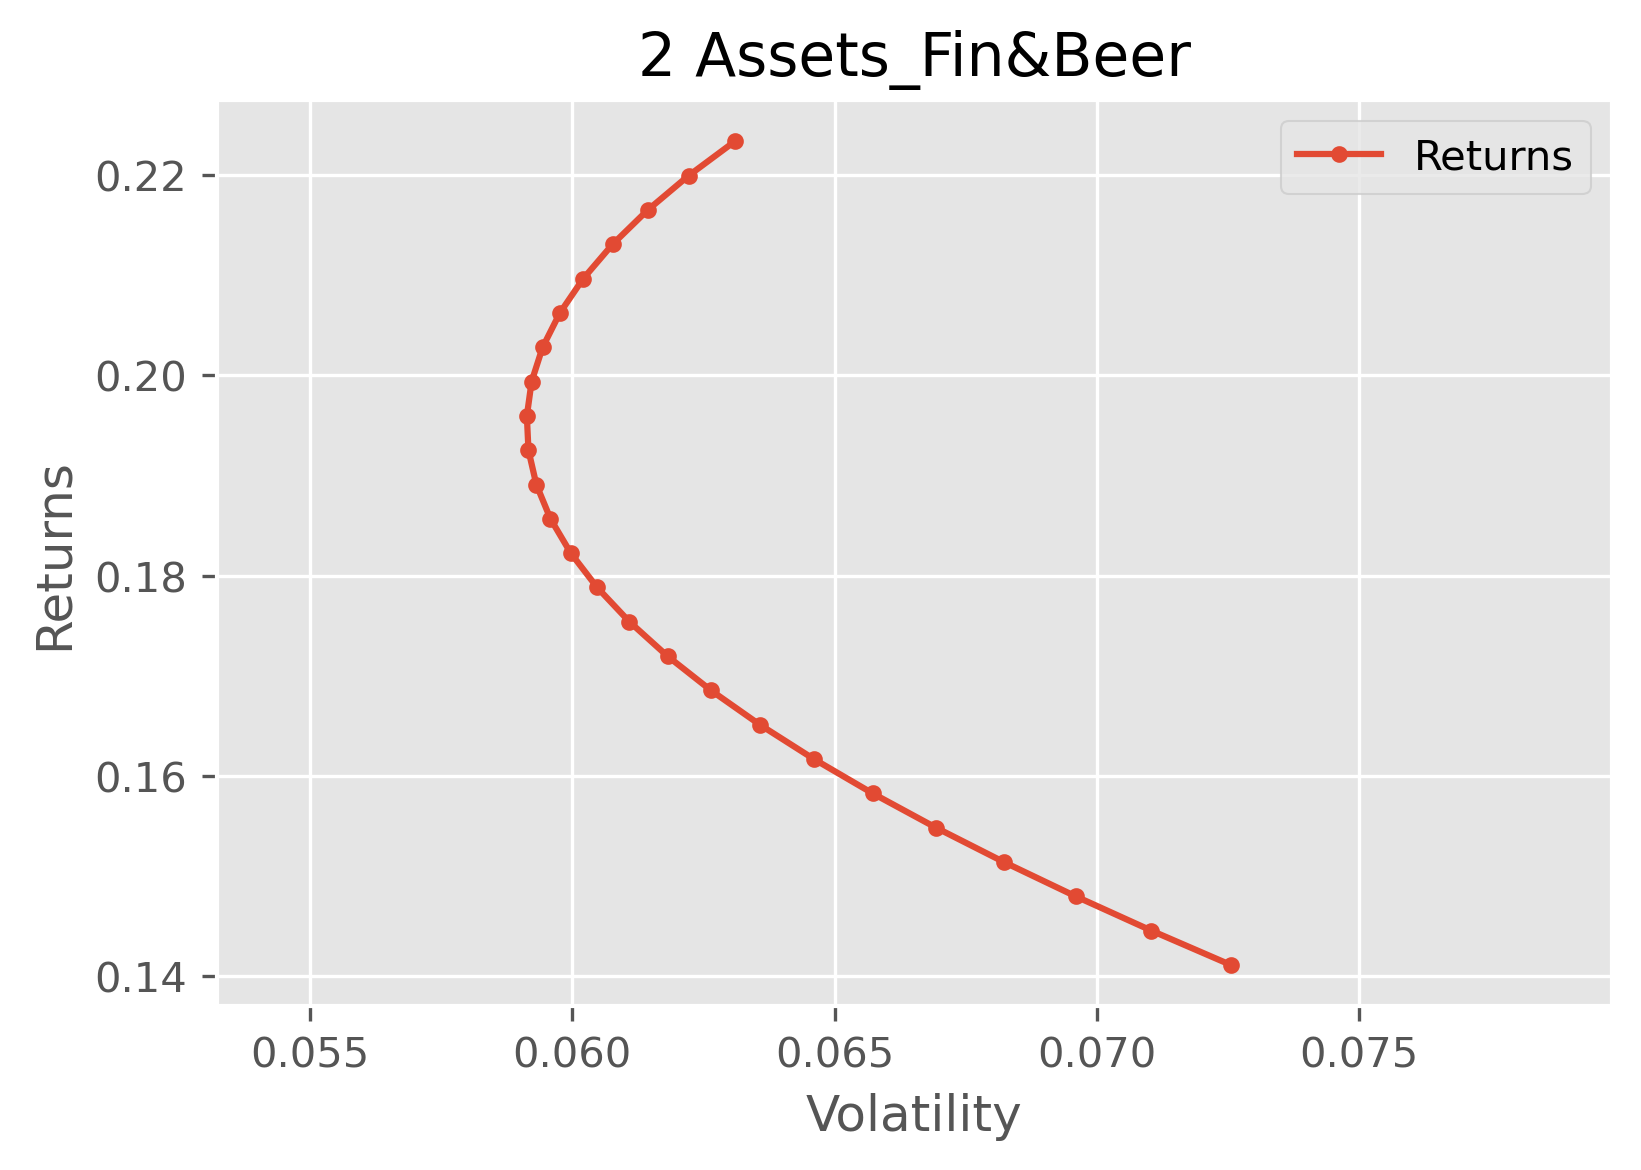

In [9]:
l = ["Fin", "Beer"]
sim_ef2(25, er[l].values, cov.loc[l,l])
title = f'{len(l)} Assets_{l[0]}&{l[1]}'
plt.title(title)
plt.ylabel('Returns')

### Multiple Assets Simulation (Required)

In [10]:
def sim_efn(n_points, er, cov):
    """
    Simulates the n-asset portfolio returns and volatility (n>2)
    """
    n_assets = er.shape[0]
    weights = np.random.dirichlet(np.ones(n_assets), n_points)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    plt.figure()
    ef.plot.scatter(x="Volatility", y="Returns", xlim=[min(vols)*0.9,max(vols)*1.1], s=5)

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

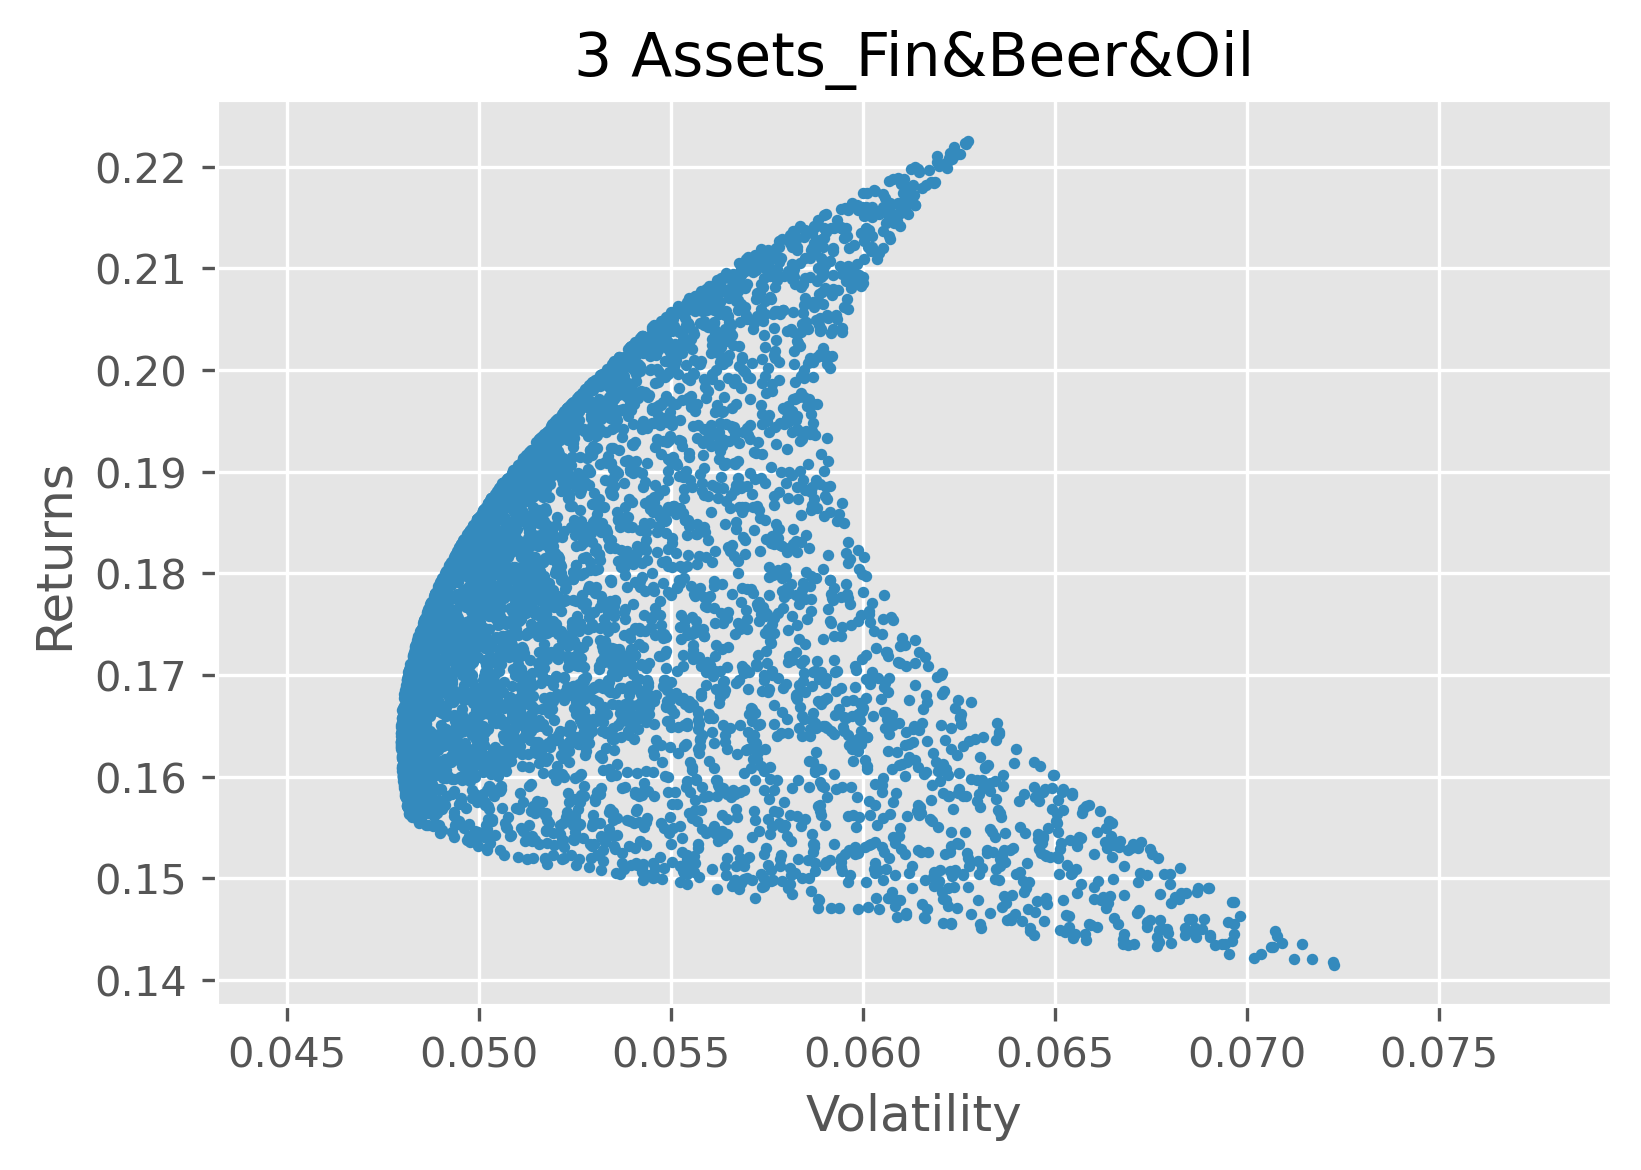

In [11]:
x = ["Fin", "Beer", "Oil"]
sim_efn(5000, er[x].values, cov.loc[x,x])
title = f'{len(x)} Assets_{x[0]}&{x[1]}&{x[2]}'
plt.title(title)
plt.ylabel('Returns')

### Replace with equity and bond ETFs (Required)

In [12]:
df_etf=pd.read_csv('ETF9data.csv',header=0,index_col=0)
df_etf.head()

IDX      CQQQ      ASHX      AFTY       QLD      FTXN  \
2018/1/1  0.056763  0.063510  0.059737  0.139384  0.178372  0.012970   
2018/2/1 -0.043048 -0.035676 -0.045771 -0.092722 -0.034255 -0.093458   
2018/3/1 -0.055733 -0.037800 -0.054819 -0.023077 -0.086878  0.039691   
2018/4/1 -0.056914 -0.043798 -0.023882 -0.047807  0.002625  0.133862   
2018/5/1  0.017434  0.034266  0.013107 -0.005021  0.112696  0.083078   

              PDBC      NANR       GLD  
2018/1/1  0.031519  0.033728  0.032349  
2018/2/1 -0.033333 -0.089099 -0.020760  
2018/3/1  0.021264  0.005990  0.006320  
2018/4/1  0.037141  0.046740 -0.009540  
2018/5/1  0.022246  0.028157 -0.011959

In [13]:
df_etf.index = pd.to_datetime(df_etf.index, format="%Y/%m/%d").to_period('M')
df_etf.columns =df_etf.columns.str.strip()
pd.set_option("display.max_columns", None)
print("Shape of the DataFrame is: ",df_etf.shape)

Shape of the DataFrame is:  (61, 9)


In [14]:
df_etf.head()

IDX      CQQQ      ASHX      AFTY       QLD      FTXN      PDBC  \
2018-01  0.056763  0.063510  0.059737  0.139384  0.178372  0.012970  0.031519   
2018-02 -0.043048 -0.035676 -0.045771 -0.092722 -0.034255 -0.093458 -0.033333   
2018-03 -0.055733 -0.037800 -0.054819 -0.023077 -0.086878  0.039691  0.021264   
2018-04 -0.056914 -0.043798 -0.023882 -0.047807  0.002625  0.133862  0.037141   
2018-05  0.017434  0.034266  0.013107 -0.005021  0.112696  0.083078  0.022246   

             NANR       GLD  
2018-01  0.033728  0.032349  
2018-02 -0.089099 -0.020760  
2018-03  0.005990  0.006320  
2018-04  0.046740 -0.009540  
2018-05  0.028157 -0.011959

In [15]:
er=annualize_rets(df_etf['2018':'2022'],12)
cov=df_etf['2018':'2022'].cov()

In [16]:
df_etf['2018':'2022']

IDX      CQQQ      ASHX      AFTY       QLD      FTXN      PDBC  \
2018-01  0.056763  0.063510  0.059737  0.139384  0.178372  0.012970  0.031519   
2018-02 -0.043048 -0.035676 -0.045771 -0.092722 -0.034255 -0.093458 -0.033333   
2018-03 -0.055733 -0.037800 -0.054819 -0.023077 -0.086878  0.039691  0.021264   
2018-04 -0.056914 -0.043798 -0.023882 -0.047807  0.002625  0.133862  0.037141   
2018-05  0.017434  0.034266  0.013107 -0.005021  0.112696  0.083078  0.022246   
2018-06 -0.084798 -0.059838 -0.092477 -0.094093  0.017057 -0.000807 -0.020170   
2018-07  0.030725 -0.034520 -0.017423  0.004522  0.050428  0.015758 -0.024919   
2018-08 -0.012576 -0.080074 -0.059645 -0.041033  0.117815 -0.006205  0.008889   
2018-09 -0.017925 -0.027328  0.034286  0.044490 -0.008274  0.002242  0.033590   
2018-10 -0.048991 -0.150676 -0.083978 -0.068321 -0.177493 -0.146965 -0.054875   
2018-11  0.116667  0.077677 -0.000603 -0.008039 -0.011714 -0.075375 -0.107384   
2018-12 -0.015830 -0.104820 -0.041702 -0.076110 -0.179008 -0.169620 -0.048311   
2019-01  0.107537  0.140462  0.103974  0.141419  0.178300  0.139024  0.072993   
2019-02 -0.067220  0.061470  0.116315  0.080593  0.056208 -0.012313  0.029066   
2019-03  0.004893  0.030424  0.051152  0.038157  0.075460  0.025474 -0.001803   
2019-04  0.020806  0.041132  0.000000  0.052004  0.108418 -0.025899  0.012041   
2019-05 -0.043365 -0.173675 -0.090909 -0.092186 -0.164627 -0.101139 -0.060083   
2019-06  0.048504  0.073373  0.071711  0.087076  0.152996  0.052155  0.036076   
2019-07 -0.008647 -0.014774 -0.002046 -0.001147  0.043120 -0.039013 -0.008552   
2019-08 -0.020497  0.013429 -0.028800 -0.042394 -0.047129 -0.092537 -0.048675   
2019-09 -0.033838  0.010601 -0.005354  0.005459  0.013623  0.057895  0.011658   
2019-10  0.027189  0.044143  0.030021  0.035618  0.084358 -0.027985  0.017926   
2019-11 -0.023329  0.044998 -0.006533 -0.012559  0.080370  0.008957 -0.001258   
2019-12  0.039045  0.053074  0.062721  0.016628  0.075627  0.045656  0.042821   
2020-01 -0.061892 -0.011601 -0.093765 -0.118508  0.056198 -0.114130 -0.086353   
2020-02 -0.113101  0.042717  0.077784  0.050521 -0.117757 -0.156969 -0.064772   
2020-03 -0.323061 -0.116442 -0.077043 -0.074616 -0.211305 -0.342428 -0.164664   
2020-04  0.131868  0.082498  0.049050  0.048286  0.305872  0.392443 -0.028765   
2020-05  0.081137  0.049585  0.001309  0.006197  0.123867  0.001951  0.074913   
2020-06  0.037845  0.166912  0.102287  0.064952  0.123374 -0.043193  0.048622   
2020-07  0.057478  0.089320  0.134154  0.112204  0.148893 -0.001850  0.047913   
2020-08  0.033314  0.025452  0.058218  0.051836  0.227723  0.028267  0.047935   
2020-09 -0.098982 -0.024679 -0.035904 -0.013811 -0.120104 -0.159982 -0.038001   
2020-10  0.039548  0.076055  0.035862  0.047905 -0.067103 -0.017704 -0.032187   
2020-11  0.184179  0.040715  0.056877  0.074268  0.225848  0.231021  0.095994   
2020-12  0.050484  0.063008  0.066883  0.053709  0.098273  0.031233  0.052414   
2021-01 -0.033981  0.123892  0.033133  0.047051  0.002259  0.103855  0.032110   
2021-02  0.004020  0.015346 -0.004964  0.001914 -0.007194  0.166888  0.103492   
2021-03 -0.041041 -0.133049 -0.065905 -0.063953  0.023136  0.038744 -0.008343   
2021-04 -0.003653  0.013628  0.038370  0.010470  0.118440 -0.000322  0.080940   
2021-05 -0.026716 -0.021439  0.065241  0.080567 -0.028153  0.094243  0.039184   
2021-06 -0.028525  0.042208 -0.021283 -0.059079  0.127493  0.074074  0.037707   
2021-07 -0.008310 -0.142637 -0.061474 -0.131148  0.055563 -0.101806  0.013937   
2021-08  0.037989 -0.017038  0.009580 -0.016103  0.083905 -0.007313 -0.016691   
2021-09  0.017761 -0.072999  0.007262  0.044807 -0.114289  0.167587  0.050924   
2021-10  0.086198  0.037549  0.024520  0.031717  0.161743  0.097792  0.051306   
2021-11 -0.030185 -0.035751 -0.002689 -0.024462  0.036314 -0.080939 -0.084049   
2021-12 -0.003514 -0.055919  0.004160  0.003026  0.016094  0.013028 -0.306364   
2022-01  0.000504 -0.046033 -0.080212 -0.0552

In [17]:
er

IDX    -0.069150
CQQQ   -0.064649
ASHX   -0.002421
AFTY   -0.020745
QLD     0.138331
FTXN    0.057655
PDBC   -0.032667
NANR    0.088640
GLD     0.065287
dtype: float64

### 1.two assets

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

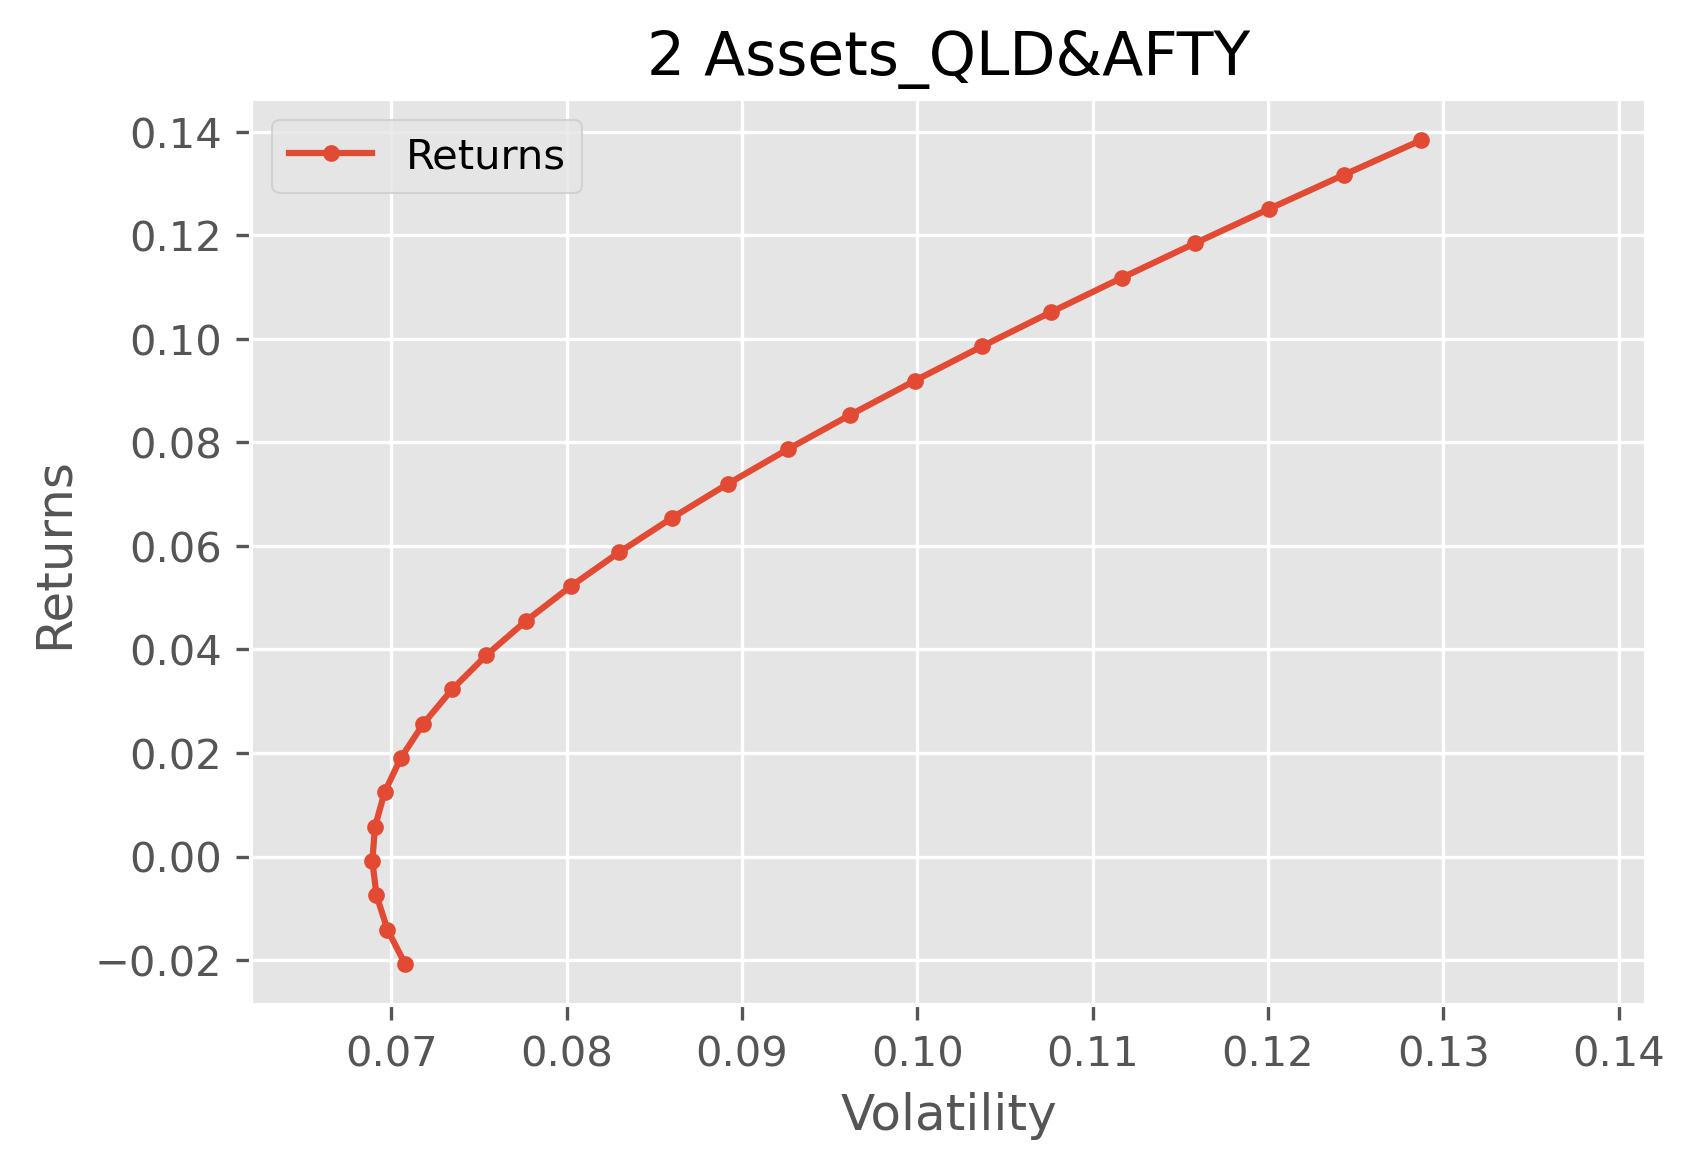

In [18]:
l = ["QLD", "AFTY"]
sim_ef2(25, er[l].values, cov.loc[l,l])
title = f'{len(l)} Assets_{l[0]}&{l[1]}'
plt.title(title)
plt.ylabel('Returns')

### 3.three assets

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

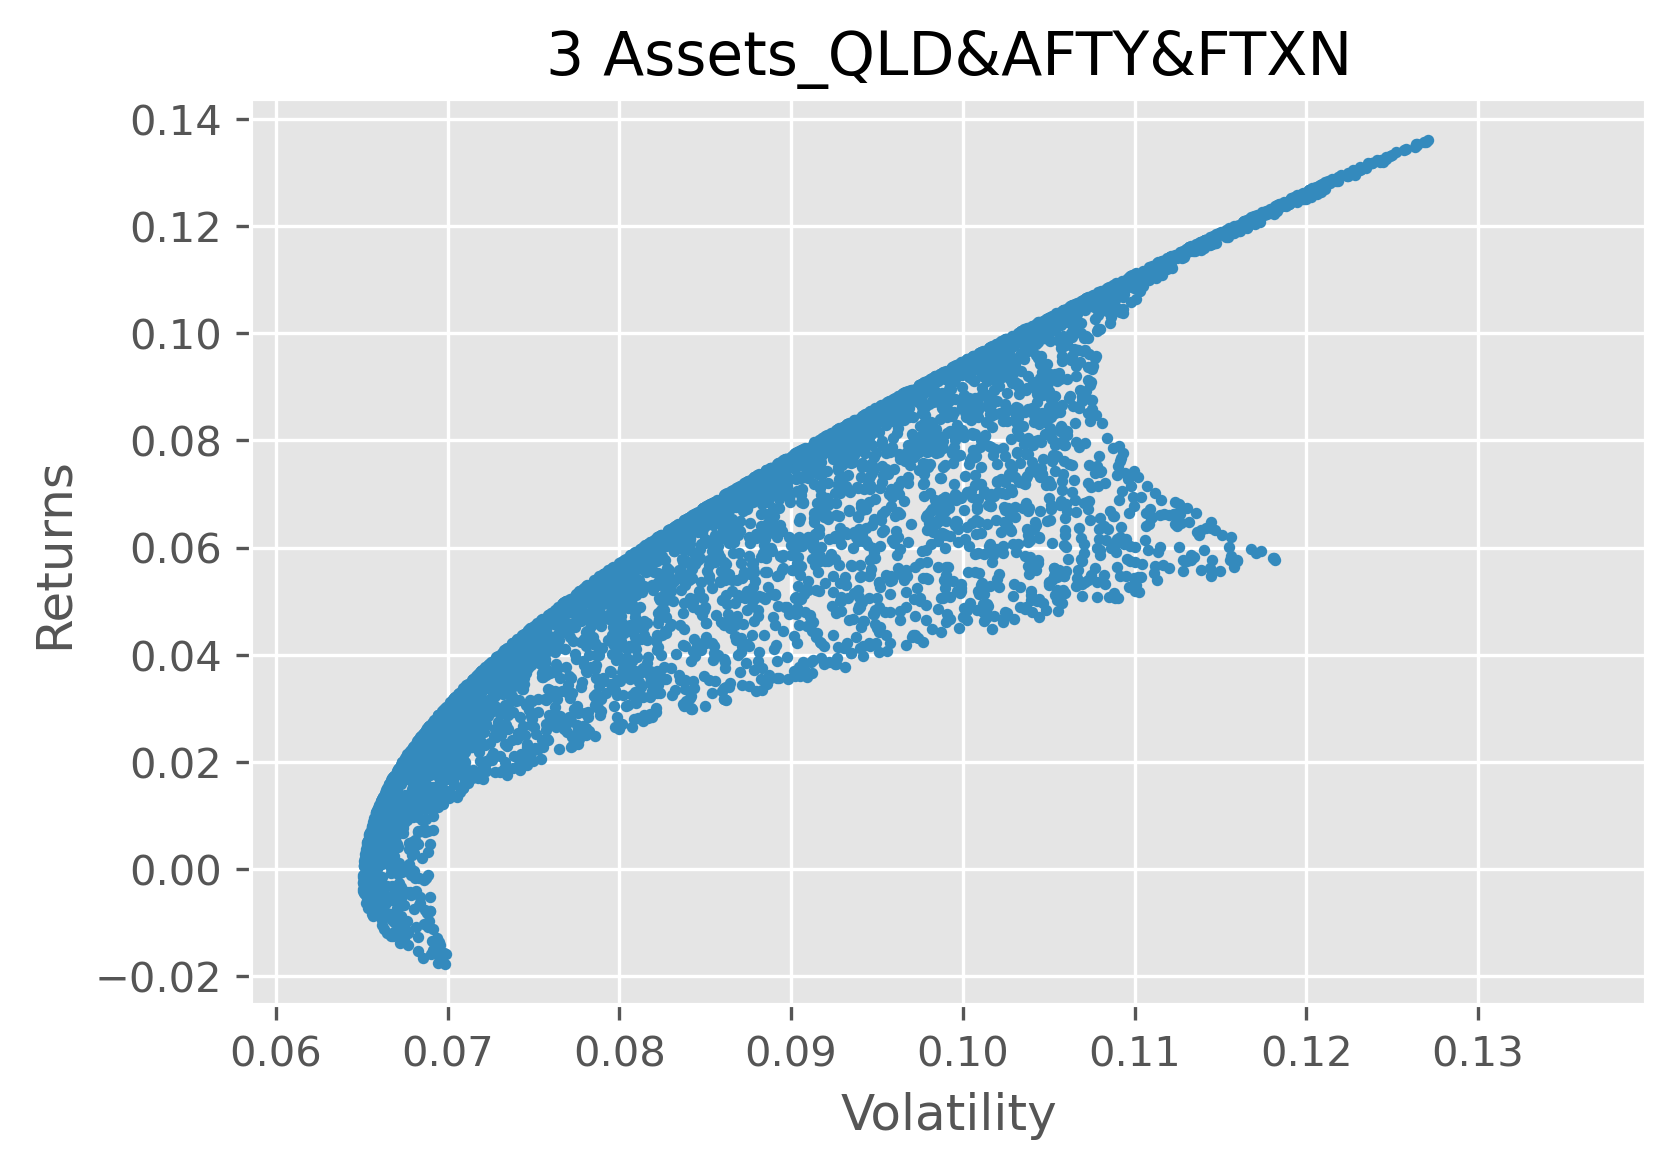

In [19]:
x = ["QLD","AFTY","FTXN"]
sim_efn(5000, er[x].values, cov.loc[x,x])
title = f'{len(x)} Assets_{x[0]}&{x[1]}&{x[2]}'
plt.title(title)
plt.ylabel('Returns')
# 加上FTXN之后有效前沿基本没变

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

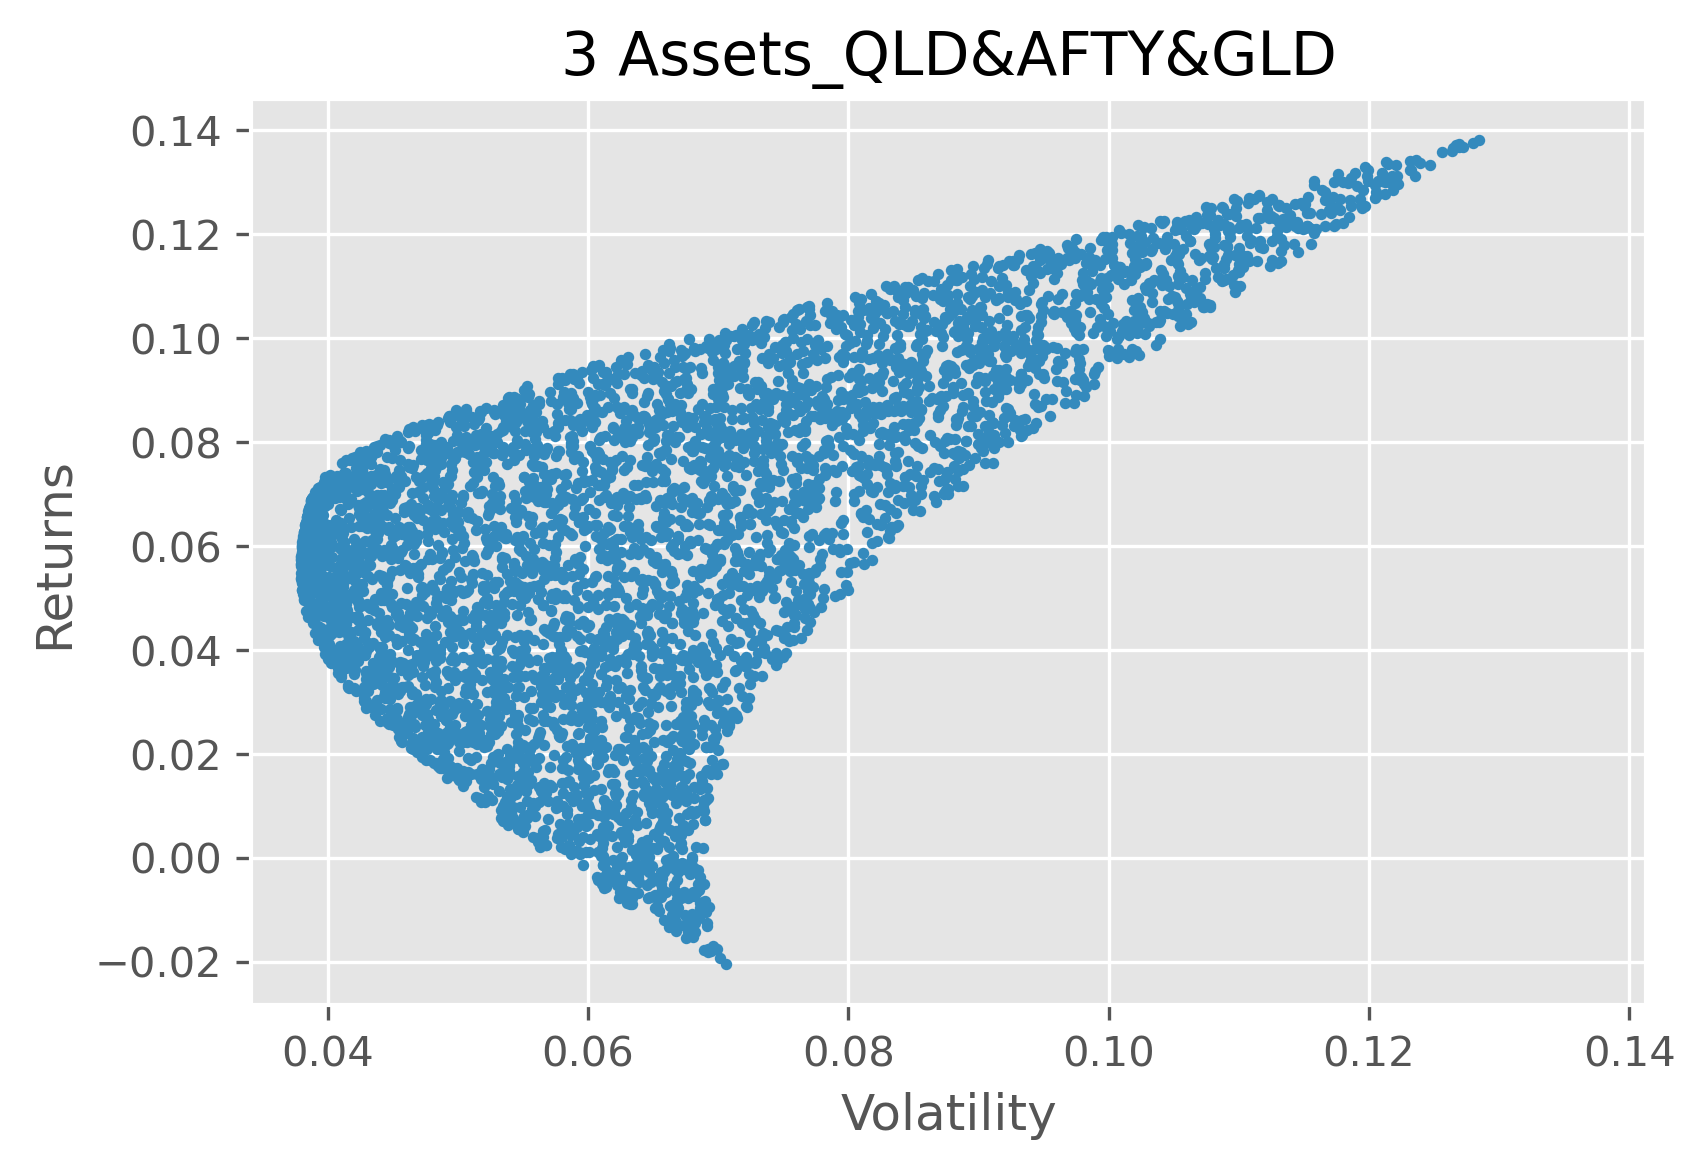

In [20]:
x = ["QLD","AFTY","GLD"]
sim_efn(5000, er[x].values, cov.loc[x,x])
title = f'{len(x)} Assets_{x[0]}&{x[1]}&{x[2]}'
plt.title(title)
plt.ylabel('Returns')
# 加上GLD之后，相同Volatility下return增加

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

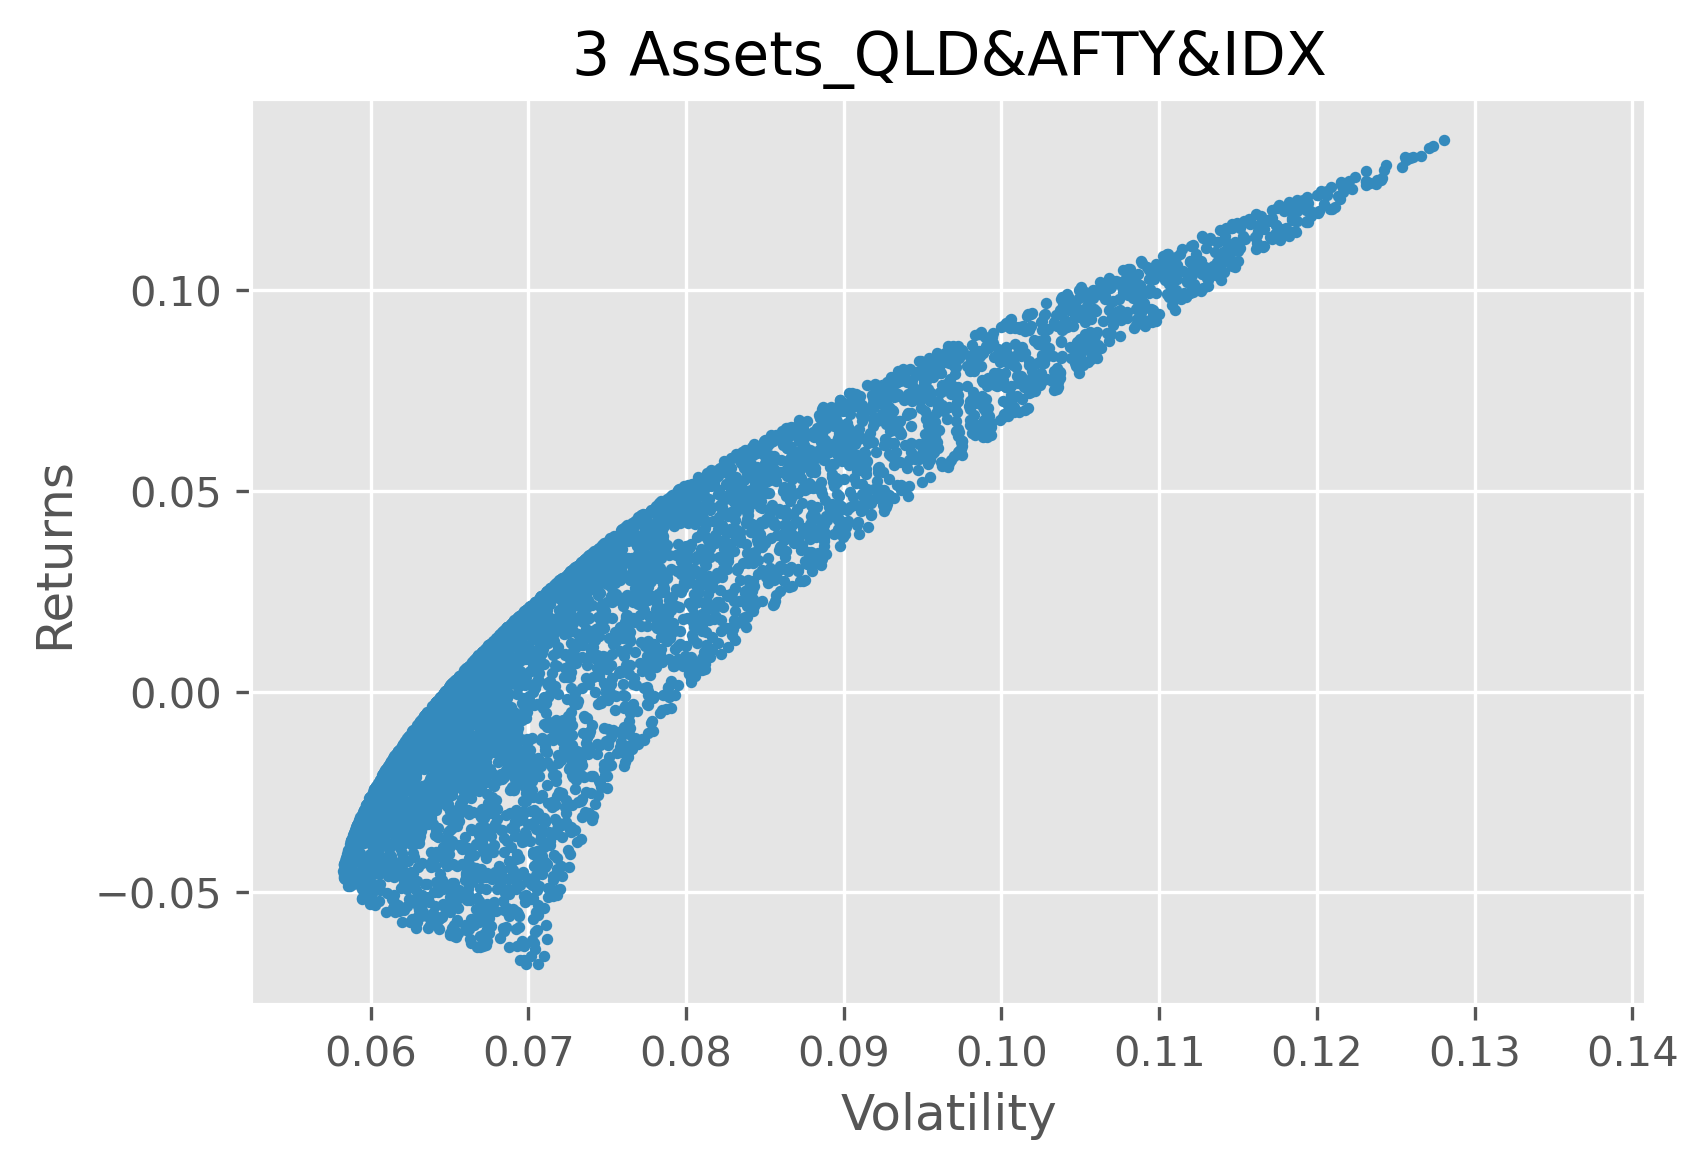

In [21]:
x = ["QLD","AFTY","IDX"]
sim_efn(5000, er[x].values, cov.loc[x,x])
title = f'{len(x)} Assets_{x[0]}&{x[1]}&{x[2]}'
plt.title(title)
plt.ylabel('Returns')
# 加上IDX之后，相同Volatility下return减少

### Discussion (Required)
Simulate for several different settings, e.g. different compositions of assets, and report the changing trend of the efficient frontier. State your observations and analysis in the report with the help of reasonable visualizations. For example, once you observe a forward shift in the effective frontier after adding / changing a new asset, try to figure out the underlying reasons.

In [22]:
df_q3=pd.read_csv('data_q3.csv', sep=';',header=0,index_col=0)/100

In [23]:
df_q3.head()

MHCI     EZU     EWJ     XOP     GDX     SPY     EEM     EWA  \
Date                                                                      
2022-12  0.0790  0.0482  0.0434  0.0616  0.0461  0.1792  0.0420  0.0263   
2022-11  0.0049 -0.0107 -0.0136 -0.1624 -0.0039 -0.2525 -0.0162 -0.0146   
2022-10  0.1143  0.0533  0.0581  0.0083  0.0489  0.2147  0.0533  0.0297   
2022-9  -0.0698  0.0323  0.0114  0.2657  0.0004  0.2903 -0.0069  0.0110   
2022-8  -0.0713 -0.0335 -0.0474 -0.2003  0.0032 -0.3800 -0.0455 -0.0229   

            EWY  
Date             
2022-12  0.0738  
2022-11 -0.0422  
2022-10  0.0889  
2022-9   0.0445  
2022-8  -0.1055

In [24]:
df_q3.index = pd.to_datetime(df_q3.index, format="%Y-%m").to_period('M')
df_q3.columns = df_q3.columns.str.strip() # remove first and last spaces from the attributes' name
pd.set_option("display.max_columns", None) # add this line of code to avoid some columns being omitted
print("Shape of the DataFrame is: ",df_q3.shape) 
# As you can see, the DataFrame is structured as a time series

Shape of the DataFrame is:  (60, 9)


In [25]:
er=annualize_rets(df_q3,12)
cov=df_q3.cov()

In [26]:
print(cov)

          MHCI       EZU       EWJ       XOP       GDX       SPY       EEM  \
MHCI  0.001852  0.000473  0.000485  0.001406  0.000243  0.002310  0.000783   
EZU   0.000473  0.000644  0.000534  0.001973  0.000270  0.004029  0.000469   
EWJ   0.000485  0.000534  0.000670  0.001955  0.000169  0.003619  0.000440   
XOP   0.001406  0.001973  0.001955  0.018429  0.000670  0.015106  0.001651   
GDX   0.000243  0.000270  0.000169  0.000670  0.000794  0.002064  0.000236   
SPY   0.002310  0.004029  0.003619  0.015106  0.002064  0.035269  0.002881   
EEM   0.000783  0.000469  0.000440  0.001651  0.000236  0.002881  0.000523   
EWA   0.000213  0.000305  0.000274  0.001213  0.000202  0.002257  0.000233   
EWY   0.001093  0.000958  0.000962  0.003691  0.000450  0.006248  0.000915   

           EWA       EWY  
MHCI  0.000213  0.001093  
EZU   0.000305  0.000958  
EWJ   0.000274  0.000962  
XOP   0.001213  0.003691  
GDX   0.000202  0.000450  
SPY   0.002257  0.006248  
EEM   0.000233  0.000915  
EWA

In [27]:
er

MHCI   -0.048200
EZU    -0.008036
EWJ    -0.012207
XOP    -0.120210
GDX     0.014508
SPY     0.011843
EEM    -0.020148
EWA     0.000984
EWY    -0.040594
dtype: float64

# 1.two assets

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

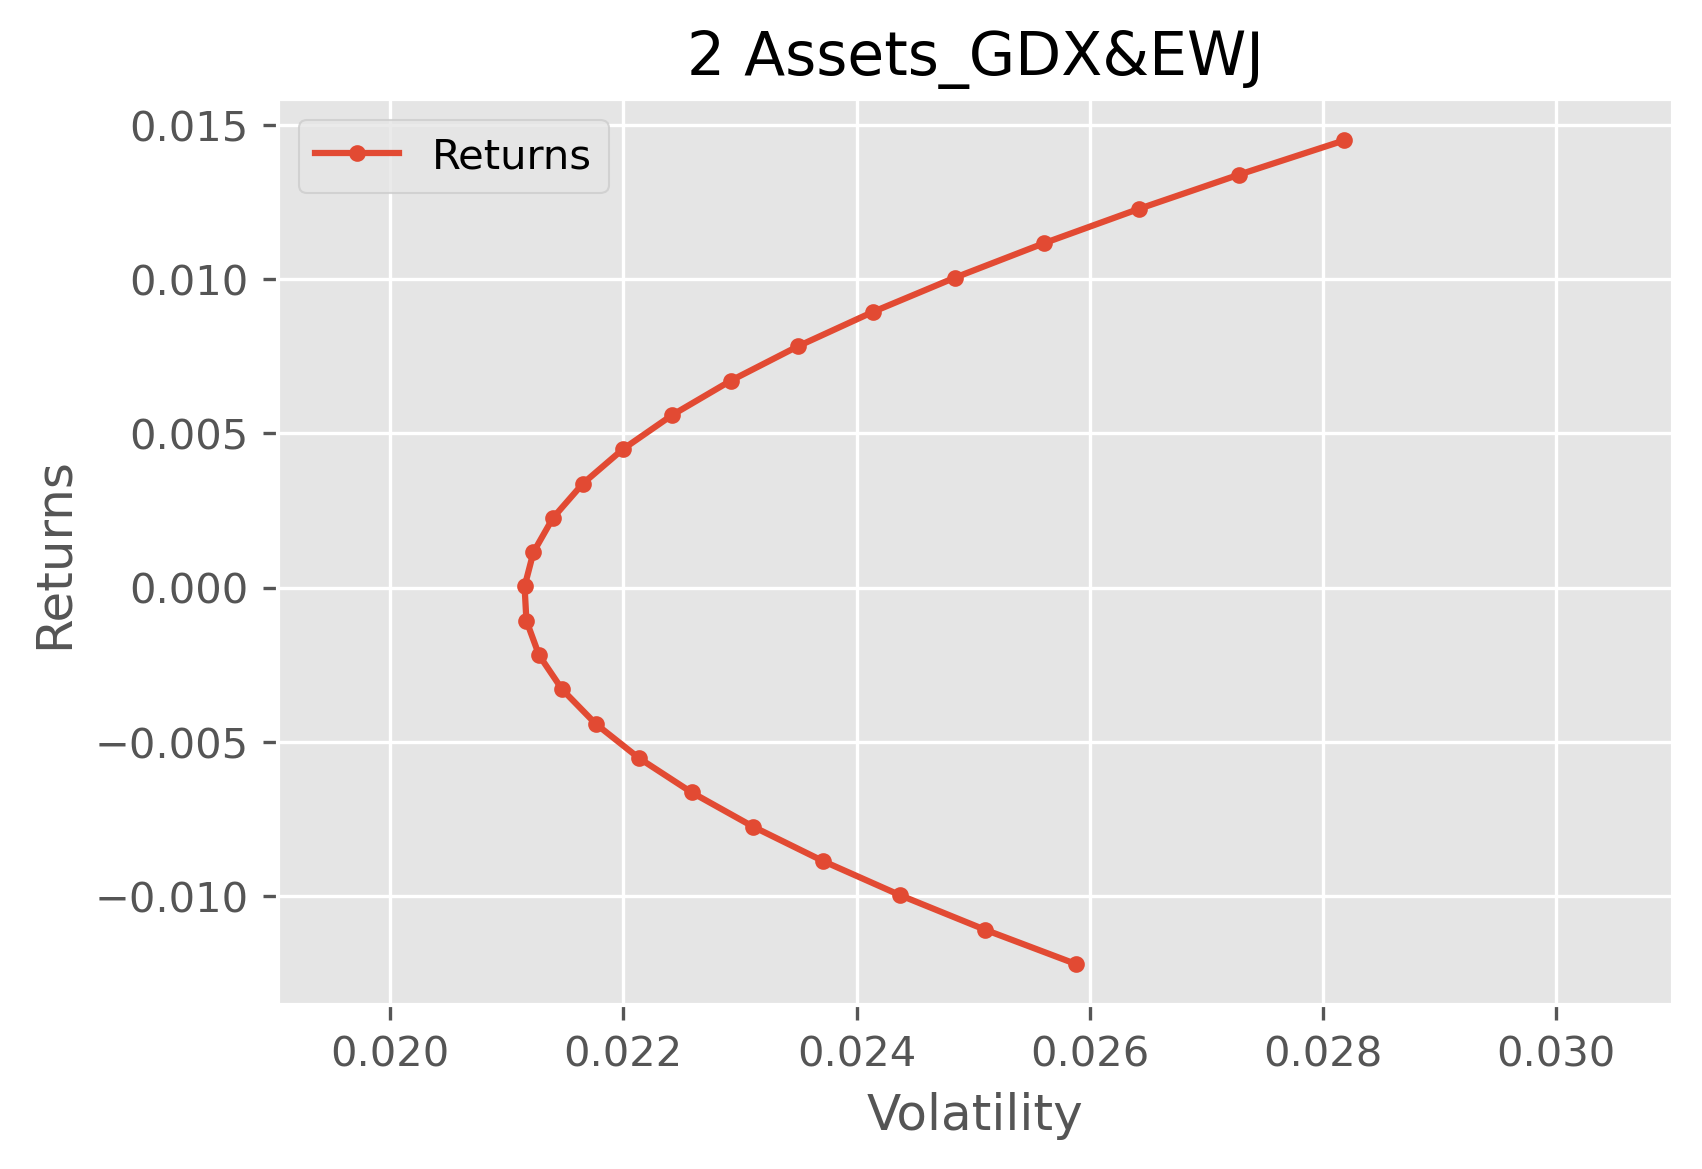

In [28]:
l = ["GDX", "EWJ"]
sim_ef2(25, er[l].values, cov.loc[l,l])
title = f'{len(l)} Assets_{l[0]}&{l[1]}'
plt.title(title)
plt.ylabel('Returns')

### 2.three assets

Text(0, 0.5, 'Returns')

<Figure size 1800x1200 with 0 Axes>

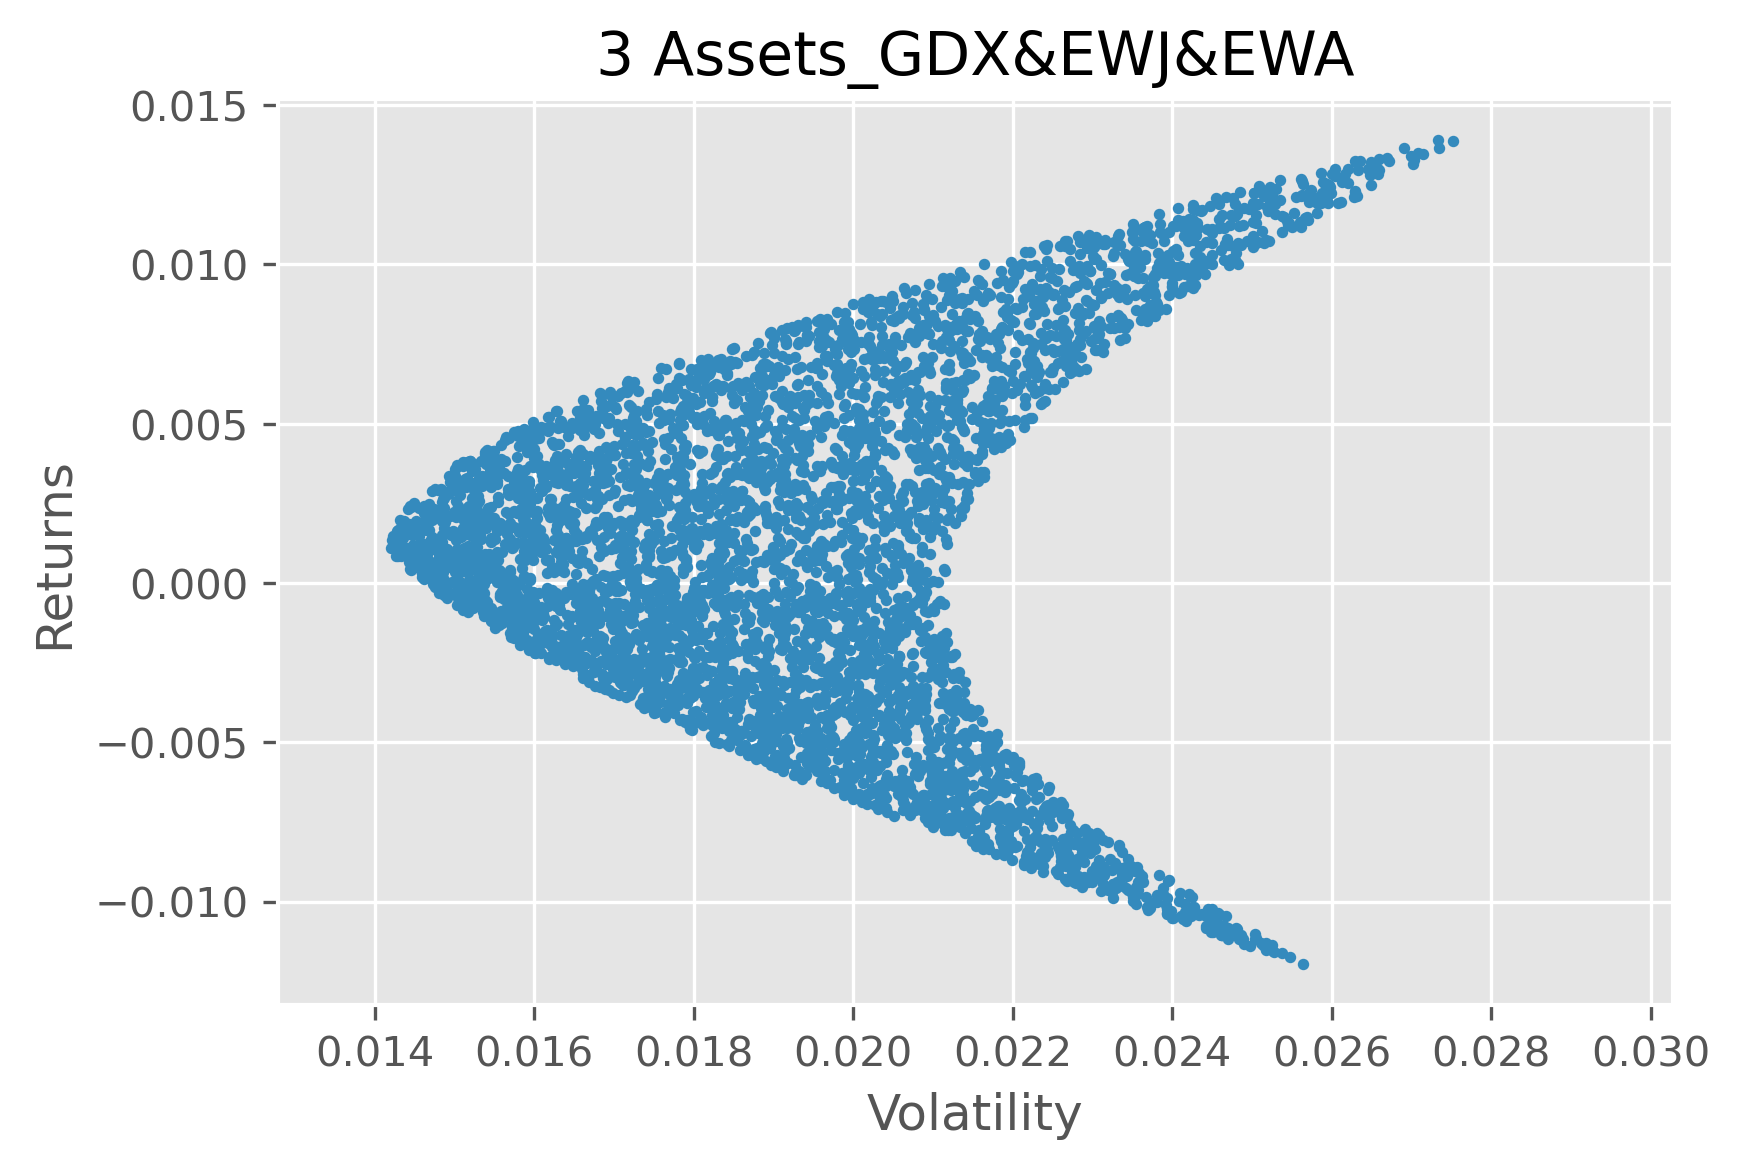

In [29]:
x = ["GDX","EWJ","EWA"]
sim_efn(5000, er[x].values, cov.loc[x,x])
title = f'{len(x)} Assets_{x[0]}&{x[1]}&{x[2]}'
plt.title(title)
plt.ylabel('Returns')

### Optimization (Bonus Question)

Using Mean-Variance Optimization approach to achieve the efficient frontier (minimize standard deviation given each expected return level) by changing weights of your assets. 

You need three or more than three asset inputs for this question.

Then draw the efficient frontier.

In [30]:
from scipy.optimize import minimize

# Define a list of expected return levels
expected_returns = np.linspace(er.min(), er.max(), 50)

# Initialize an empty list to store the optimized weights for each expected return level
optimal_weights = []

# Define the optimization function
def optimize_portfolio(weights, returns, cov_matrix, target_return):
    portfolio_return_val = portfolio_return(weights, returns)
    portfolio_vol_val = portfolio_vol(weights, cov_matrix)
    return (target_return - portfolio_return_val) / portfolio_vol_val

In [31]:
# Loop through each expected return level
for target_return in expected_returns:
    n_assets = er.shape[0]
    # Initialize the starting weights as equal weights
    initial_weights = np.ones(n_assets) / n_assets
    # Constrain the weights to sum up to 1
    bounds = [(0,1) for i in range(n_assets)]
    # Minimize the optimization function
    opt_results = minimize(optimize_portfolio, initial_weights, args=(er, cov, target_return),
                           bounds=bounds, method='SLSQP', options={'disp': False})
    # Append the optimized weights to the list
    optimal_weights.append(opt_results.x)
    

<ipython-input-30-c594acf35463>:13: RuntimeWarning: divide by zero encountered in double_scalars
  return (target_return - portfolio_return_val) / portfolio_vol_val


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

<Figure size 1800x1200 with 0 Axes>

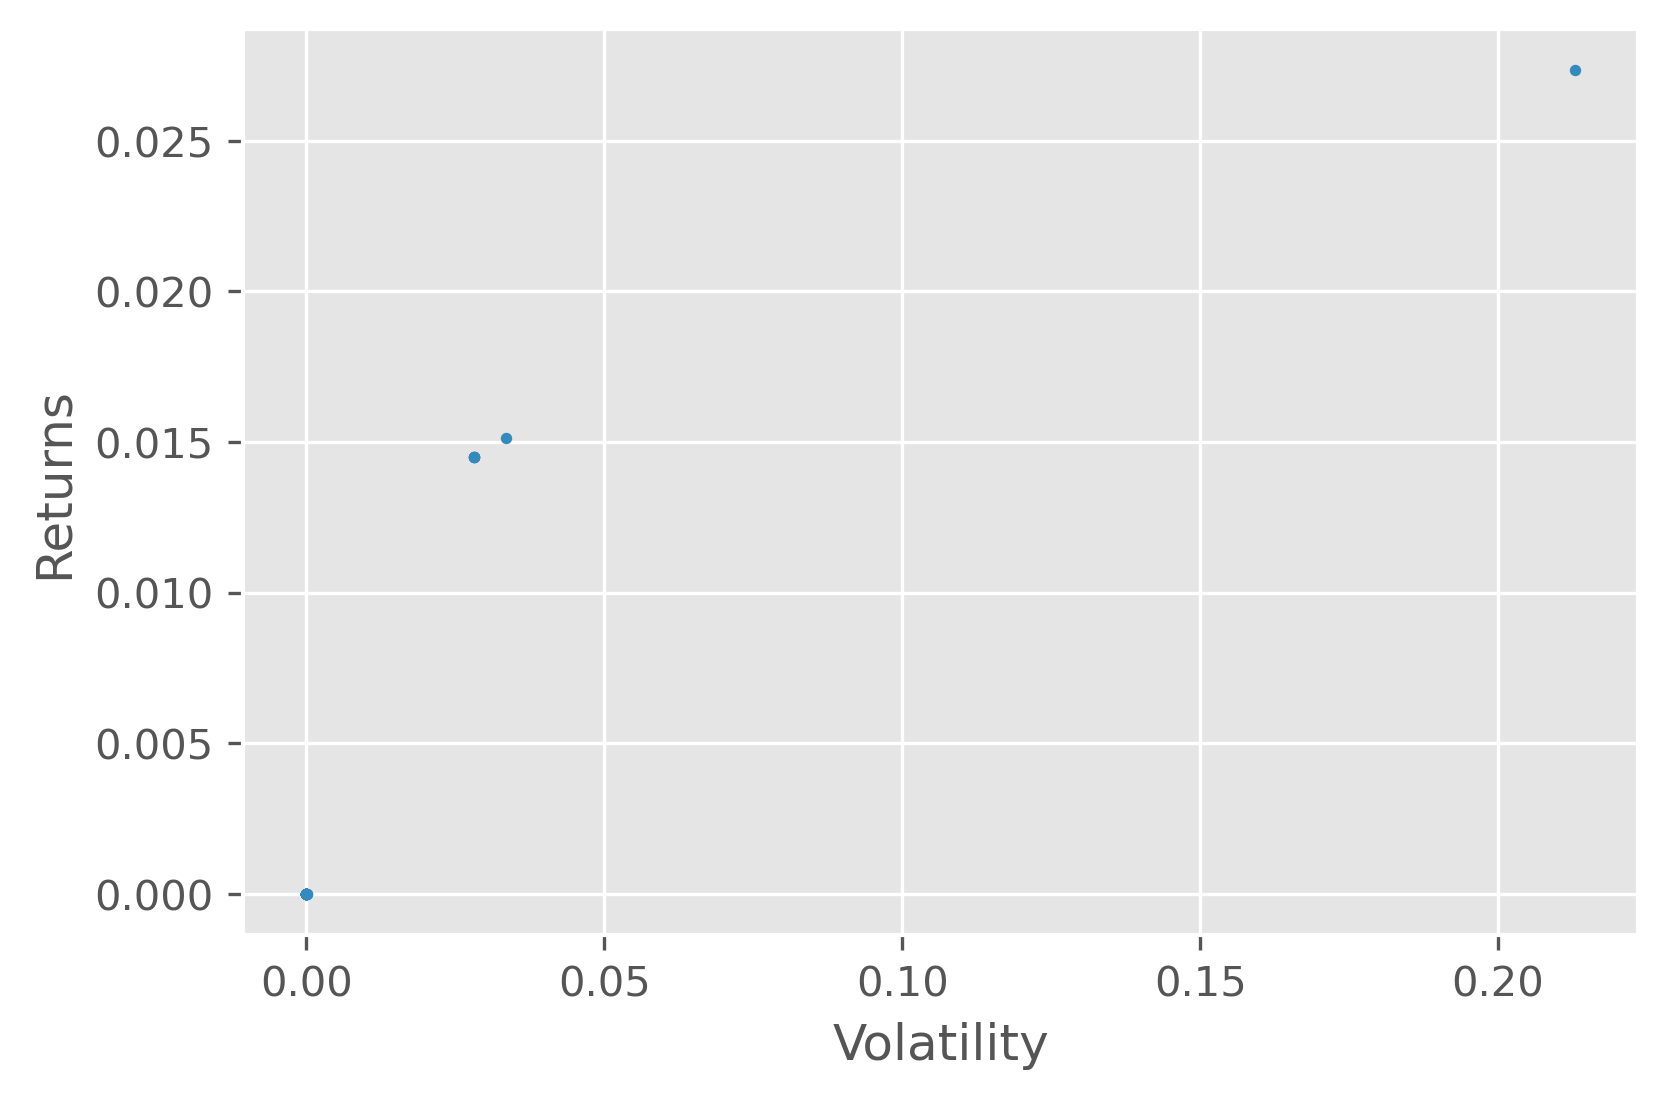

In [32]:
# Calculate the returns and volatilities for the optimized portfolios
optimal_returns = [portfolio_return(w, er) for w in optimal_weights]
optimal_volatilities = [portfolio_vol(w, cov) for w in optimal_weights]

optimal = pd.DataFrame({
    "Returns":optimal_returns,
    "Volatility":optimal_volatilities})

# Plot the efficient frontier
plt.figure()
optimal.plot.scatter(x="Volatility", y="Returns", s=5)

In [33]:
data=ind[["Fin", "Beer", "Oil"]]

In [35]:
train_set = data[data.index>'2015-12']
train_set.head()

Fin    Beer     Oil
2016-01 -0.0962 -0.0022 -0.0463
2016-02 -0.0283 -0.0232 -0.0298
2016-03  0.0667  0.0563  0.1085
2016-04  0.0397  0.0032  0.0908
2016-05  0.0216 -0.0090 -0.0093

In [36]:
class MeanVariance:
    #传入收益率数据
    def __init__(self,returns):
        self.returns = returns
    #定义最小化方差函数，即求解二次规划
    def minVar(self,goalRet):
        covs = np.array(self.returns.cov())
        means = np.array(self.returns.mean())
        L1 = np.append(np.append(covs.swapaxes(0,1),[means],0),
                      [np.ones(len(means))],0).swapaxes(0,1)
        L2 = list(np.ones(len(means)))
        L2.extend([0,0])
        L3 = list(means)
        L3.extend([0,0])
        L4 = np.array([L2,L3])
        L = np.append(L1,L4,0)
        results = linalg.solve(L,np.append(np.zeros(len(means)),[1,goalRet],0))
        return np.array([list(self.returns.columns),results[:-2]])
    #定义绘制最小方差前缘曲线函数
    def frontierCurve(self):
        goals = [x/500000 for x in range(-100,4000)]
        variances = list(map(lambda x: self.calVar(self.minVar(x)[1,:].astype(np.float)),goals))
        plt.plot(variances,goals)
    #定义各资产比例，计算收益率均值
    def meanRet(self,fracs):
        meanRisky = ffn.to_returns(self.returns).mean()
        #assert (len(meanRisky == len(fracs),'Length of fractions must be equal to number of assets')
        return np.sum(np.multiply(meanRisky,np.array(fracs)))
    #定义各资产比例，计算收益率方差
    def calVar(self,fracs):
        return np.dot(np.dot(fracs,self.returns.cov()),fracs)

<ipython-input-36-0fc7b8fbc071>:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  variances = list(map(lambda x: self.calVar(self.minVar(x)[1,:].astype(np.float)),goals))


Text(0.5, 1.0, 'Mean-variance')

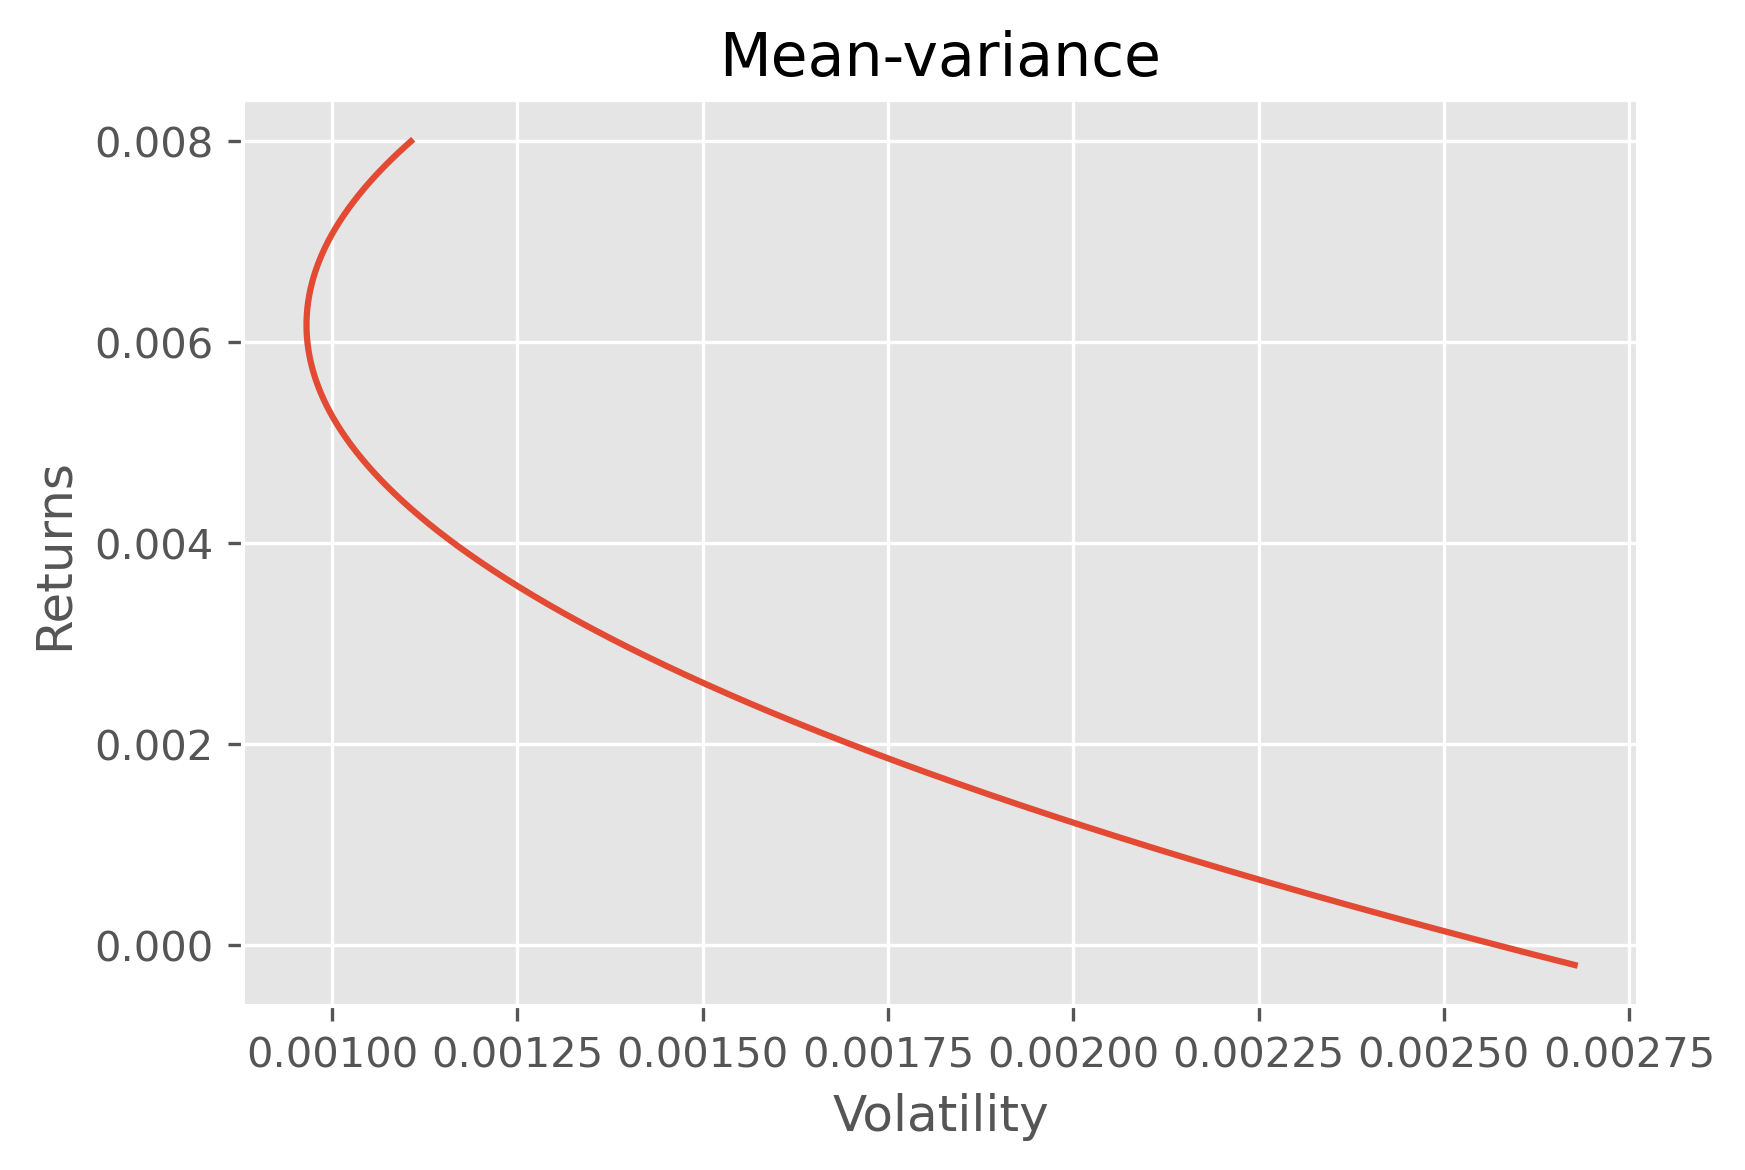

In [41]:
minVar = MeanVariance(train_set)
minVar.frontierCurve()
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.title('Mean-variance')